###Código 1 - Máquina de Turing
Autômato com Implementação de Pilha
Um autômato de pilha é um tipo de autômato que, além dos estados, também possui uma pilha que pode ser usada para armazenar e recuperar símbolos. Ele é mais poderoso do que um autômato finito, pois pode reconhecer linguagens context-free.


In [ ]:
class TuringMachine:
    def __init__(self, tape, initial_state, accepting_states, transitions):
        self.tape = list(tape)
        self.head_position = 0
        self.current_state = initial_state
        self.accepting_states = accepting_states
        self.transitions = transitions

    def step(self):
        if self.current_state in self.accepting_states:
            return False
        current_symbol = self.tape[self.head_position]
        action = self.transitions.get((self.current_state, current_symbol))
        if action is None:
            return False
        new_state, new_symbol, direction = action
        self.tape[self.head_position] = new_symbol
        self.current_state = new_state
        if direction == 'R':
            self.head_position += 1
        elif direction == 'L':
            self.head_position -= 1
        return True

    def run(self):
        while self.step():
            pass
        return ''.join(self.tape), self.current_state

# Exemplo de uso
tape = "0110"
initial_state = "q0"
accepting_states = {"q_accept"}
transitions = {
    ("q0", "0"): ("q1", "1", "R"),
    ("q1", "1"): ("q_accept", "1", "R"),
    # Adicione mais transições conforme necessário
}

tm = TuringMachine(tape, initial_state, accepting_states, transitions)
result_tape, final_state = tm.run()
print(f"Fita final: {result_tape}")
print(f"Estado final: {final_state}")

Fita final: 1110
Estado final: q_accept


In [ ]:
class StackAutomaton:
    def __init__(self, initial_state, accepting_states, transitions):
        self.stack = []
        self.current_state = initial_state
        self.accepting_states = accepting_states
        self.transitions = transitions

    def step(self, input_symbol):
        action = self.transitions.get((self.current_state, input_symbol, self.stack[-1] if self.stack else None))
        if action is None:
            return False
        new_state, stack_action, stack_symbol = action
        self.current_state = new_state
        if stack_action == "PUSH":
            self.stack.append(stack_symbol)
        elif stack_action == "POP":
            self.stack.pop()
        return True

    def run(self, input_string):
        for symbol in input_string:
            if not self.step(symbol):
                return False
        return self.current_state in self.accepting_states

# Exemplo de uso
initial_state = "q0"
accepting_states = {"q_accept"}
transitions = {
    ("q0", "a", None): ("q1", "PUSH", "A"),
    ("q1", "b", "A"): ("q_accept", "POP", None),
    # Adicione mais transições conforme necessário
}

sa = StackAutomaton(initial_state, accepting_states, transitions)
input_string = "ab"
is_accepted = sa.run(input_string)
print(f"A entrada '{input_string}' foi {'aceita' if is_accepted else 'rejeitada'} pelo autômato de pilha.")

A entrada 'ab' foi aceita pelo autômato de pilha.


###Código 2 - Máquina de Turing
Exemplo de Máquina de Turing para aceitar a linguagem a^n b^n (n >= 1)
Isso significa que a Máquina de Turing aceitará strings com um número igual de 'a's seguidos por um número igual de 'b's, como aabb, aaabbb, etc.

In [ ]:
class TuringMachine:
    def __init__(self, tape, initial_state, accepting_states, transitions):
        self.tape = list(tape) + [' '] * 100  # Adicionando espaço extra na fita
        self.head_position = 0
        self.current_state = initial_state
        self.accepting_states = accepting_states
        self.transitions = transitions

    def step(self):
        if self.current_state in self.accepting_states:
            return False
        current_symbol = self.tape[self.head_position]
        action = self.transitions.get((self.current_state, current_symbol))
        if action is None:
            return False
        new_state, new_symbol, direction = action
        self.tape[self.head_position] = new_symbol
        self.current_state = new_state
        if direction == 'R':
            self.head_position += 1
        elif direction == 'L':
            self.head_position -= 1
        return True

    def run(self):
        while self.step():
            pass
        return ''.join(self.tape), self.current_state

# Exemplo de uso
tape = "aaabbb"
initial_state = "q0"
accepting_states = {"q_accept"}
transitions = {
    ("q0", "a"): ("q1", "X", "R"),
    ("q1", "a"): ("q1", "a", "R"),
    ("q1", "b"): ("q2", "Y", "L"),
    ("q2", "a"): ("q2", "a", "L"),
    ("q2", "X"): ("q0", "X", "R"),
    ("q1", "Y"): ("q1", "Y", "R"),
    ("q1", " "): ("q_accept", " ", "N"),
    # Adicione mais transições conforme necessário
}

tm = TuringMachine(tape, initial_state, accepting_states, transitions)
result_tape, final_state = tm.run()
print(f"Fita final: {result_tape.strip()}")
print(f"Estado final: {final_state}")

Fita final: XXaYYb
Estado final: q2


Para o exemplo acima, o grafo seria:

q0 --a--> q1 (PUSH A)

q1 --a--> q1 (PUSH A)

q1 --b--> q2 (POP)

q2 --b--> q2 (POP)

q2 --ε--> q_accept

Agora, expandindo o exemplo do Autômato de Pilha para recusar uma entrada não pertencente a linguagem a^n b^n (n >= 1).

In [ ]:
class StackAutomaton:
    def __init__(self, initial_state, accepting_states, transitions):
        self.stack = []
        self.current_state = initial_state
        self.accepting_states = accepting_states
        self.transitions = transitions

    def step(self, input_symbol):
        top_symbol = self.stack[-1] if self.stack else None
        action = self.transitions.get((self.current_state, input_symbol, top_symbol))
        if action is None:
            return False
        new_state, stack_action, stack_symbol = action
        self.current_state = new_state
        if stack_action == "PUSH":
            self.stack.append(stack_symbol)
        elif stack_action == "POP":
            self.stack.pop()
        return True

    def run(self, input_string):
        for symbol in input_string:
            if not self.step(symbol):
                return False
        return self.current_state in self.accepting_states and not self.stack

# Exemplo de uso
initial_state = "q0"
accepting_states = {"q_accept"}
transitions = {
    ("q0", "a", None): ("q1", "PUSH", "A"),
    ("q1", "a", "A"): ("q1", "PUSH", "A"),
    ("q1", "b", "A"): ("q2", "POP", None),
    ("q2", "b", "A"): ("q2", "POP", None),
    ("q2", None, None): ("q_accept", None, None),
    # Adicione mais transições conforme necessário
}

sa = StackAutomaton(initial_state, accepting_states, transitions)
input_string = "aaabbb"
is_accepted = sa.run(input_string)
print(f"A entrada '{input_string}' foi {'aceita' if is_accepted else 'rejeitada'} pelo autômato de pilha.")

A entrada 'aaabbb' foi rejeitada pelo autômato de pilha.


Grafo do Autômato de Pilha
Para o exemplo acima, o grafo seria:

q0 --a--> q1 (PUSH A)

q1 --a--> q1 (PUSH A)

q1 --b--> q2 (POP)

q2 --b--> q2 (POP)

q2 --ε--> q_accept

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-dejavu is already the newest version (2.37-2build1).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
GIF salvo com 13 frames!


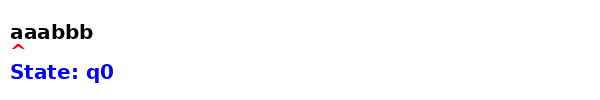

In [ ]:
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display
import PIL.Image

# Instalando a fonte no Google Colab (se necessário)
!apt-get install -y fonts-dejavu

class TuringMachine:
    def __init__(self, tape, initial_state, accepting_states, transitions):
        self.tape = list(tape) + [' '] * 100  # Adicionando espaço extra na fita
        self.head_position = 0
        self.current_state = initial_state
        self.accepting_states = accepting_states
        self.transitions = transitions
        self.frames = []

        # Carregando uma fonte TTF válida
        self.font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 20)

    def draw_tape(self):
        width, height = 600, 100
        img = Image.new('RGB', (width, height), color='white')
        d = ImageDraw.Draw(img)

        tape_str = ''.join(self.tape).strip()
        head_str = ' ' * self.head_position + '^'

        d.text((10, 20), tape_str, font=self.font, fill=(0, 0, 0))
        d.text((10, 40), head_str, font=self.font, fill=(255, 0, 0))
        d.text((10, 60), f"State: {self.current_state}", font=self.font, fill=(0, 0, 255))

        self.frames.append(img)

    def step(self):
        self.draw_tape()
        if self.current_state in self.accepting_states:
            return False
        current_symbol = self.tape[self.head_position]
        action = self.transitions.get((self.current_state, current_symbol))
        if action is None:
            return False
        new_state, new_symbol, direction = action
        self.tape[self.head_position] = new_symbol
        self.current_state = new_state
        if direction == 'R':
            self.head_position += 1
        elif direction == 'L':
            self.head_position -= 1
        return True

    def run(self):
        while self.step():
            pass
        self.draw_tape()

        # Verificando se os frames foram gerados
        if len(self.frames) > 0:
            self.frames[0].save('/content/turing_machine.gif', save_all=True, append_images=self.frames[1:], loop=0, duration=500)
            print(f"GIF salvo com {len(self.frames)} frames!")
        else:
            print("Erro: Nenhum frame foi gerado!")

# Exemplo de uso
tape = "aaabbb"
initial_state = "q0"
accepting_states = {"q_accept"}
transitions = {
    ("q0", "a"): ("q1", "X", "R"),
    ("q1", "a"): ("q1", "a", "R"),
    ("q1", "b"): ("q2", "Y", "L"),
    ("q2", "a"): ("q2", "a", "L"),
    ("q2", "X"): ("q0", "X", "R"),
    ("q1", "Y"): ("q1", "Y", "R"),
    ("q1", " "): ("q_accept", " ", "N"),
}

tm = TuringMachine(tape, initial_state, accepting_states, transitions)
tm.run()

# Exibir o GIF no Colab
display(PIL.Image.open("/content/turing_machine.gif"))
